<a href="https://colab.research.google.com/github/jhuee/DeepLearning/blob/main/kNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: k-nearest neighbor (kNN) classifier with sklearn


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.datasets import mnist

# load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# 60000 training dataset // 100000 test dataset
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


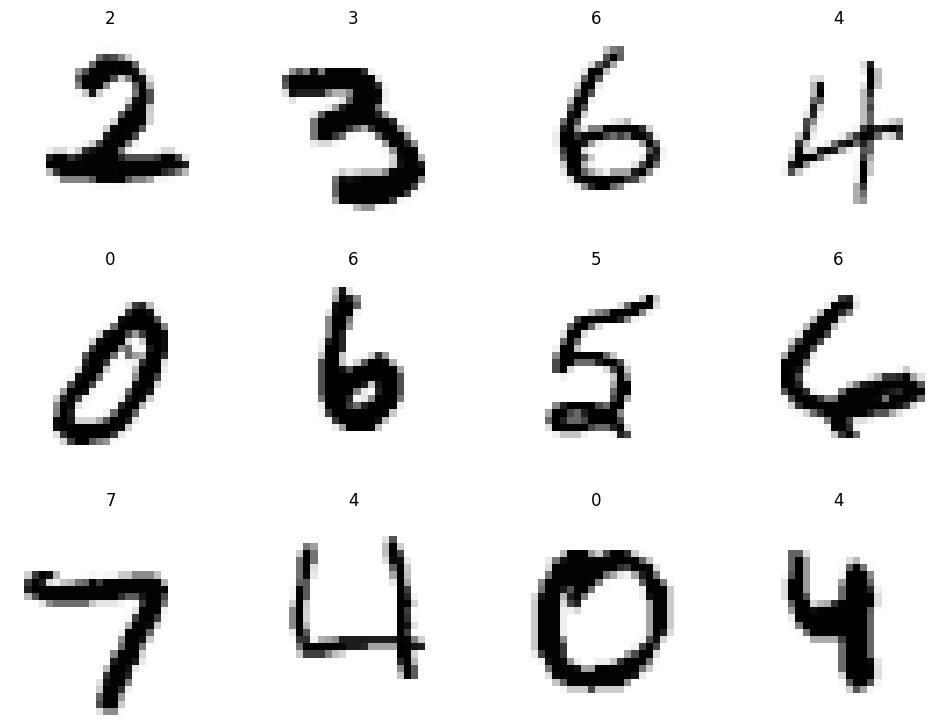

In [8]:
#Display some of the (training) data

sample_index = np.random.choice(60000, size = 12) #0~59999중에 무작위 12개 선택하여 저장
num_samples = sample_index.size #배열 크기 저장

random_sample = train_X[sample_index] #이미지 데이터

plt.figure(figsize=(12,12)) #12x12 크기의 새로운 플롯(figures)을 생성

for k in range(num_samples) :
  plt.subplot(4,4, k+1)
  plt.imshow(random_sample[k].reshape(28,28), cmap='Greys')
  plt.title(train_y[sample_index[k]])
  plt.axis('off')

plt.show()

In [10]:
#Prepare dataset for training (reshape)

X_train = train_X.reshape(60000,784).astype(float) #28*28, reshape하여 1차원 벡터로 변환
X_test = test_X.reshape(10000,784).astype(float)
y_train = train_y
y_test = test_y

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

# kNN with k=5 and L2 norm

In [11]:
#kNN training with sklearn
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p = 2) # 5-nearest neighbor // L2 norm

clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
#Measure the accuracy of the kNN
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test) #test dataset에 대하여 예측값 저장
print("Accuracy: ", accuracy_score(y_test, pred)) #test datasetd의 실제값과 예측값

Accuracy:  0.9688


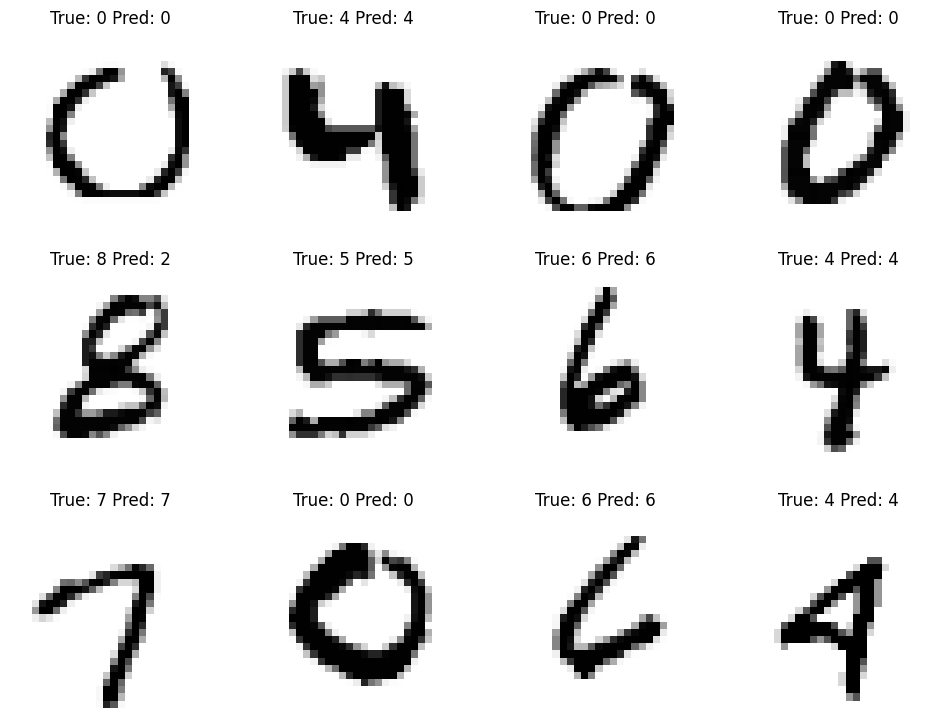

In [21]:
#Disply test result (predicted labels and actual label)

sample_index = np.random.choice(10000, size = 12)
num_sample = sample_index.size

random_samples = test_X[sample_index]

plt.figure(figsize = (12,12))

for k in range(num_sample) :
  plt.subplot(4, 4, k+1)
  plt.imshow(random_samples[k].reshape(28, 28), cmap = "Greys")
  plt.title("True: "+ str(y_test[sample_index[k]])+ " Pred: "+ str(pred[sample_index[k]]))
  plt.axis('off')

# TODO: Implement k-NN on your own(without sklearn)


In [27]:
#L2 distance
def L2_distance(x, y):
  return np.sqrt(np.sum((x-y)**2, axis = 1)) # 두 번째 축(가로 방향)을 기준으로 연산을 수행

In [28]:
# Your own K-nearest neighbor
from collections import Counter

def my_knn(X_train, y_train, X_test, k) :
  pred = [] #prediction result
  for dat in X_test :
    # Measure distance between dat and training data
    distance = L2_distance(X_train, dat)

    # Find k-minimum vlaues(index)
    kmin = np.argsort(distance)[:k]

    # Take the majority vote
    k_nearest_label = [y_train[i] for i in kmin] #k개의 이웃 레이블을 저장
    most_common = Counter(k_nearest_label).most_common(1) # 하나의 레이블만 return // 가장 많이 등장한 lable
    pred.append(most_common[0][0])
  return np.array(pred)

In [29]:
# Run my kNN classifier & measure accuracy
#test my code with only 100 test data

num_test = 100
pred = my_knn(X_train, y_train, X_test[:num_test], 5)
print("Accuracy " , accuracy_score(y_test[:num_test], pred))

Accuracy  0.99


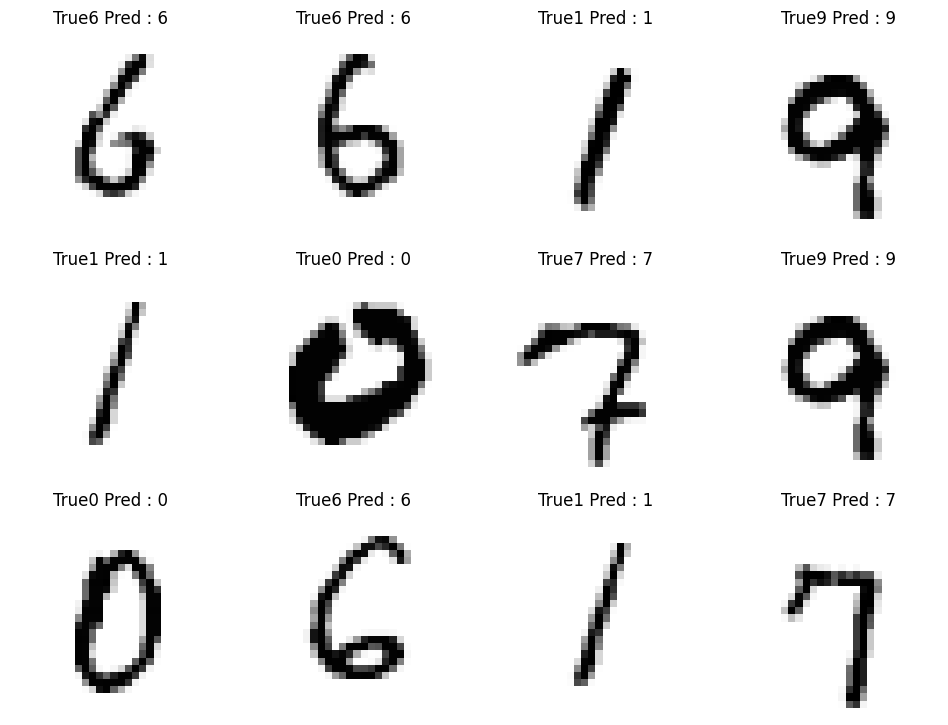

In [32]:
# Display Some test result
sample_index = np.random.choice(num_test, size = 12)
num_samples = sample_index.size

random_samples = X_test[sample_index]
plt.figure(figsize=(12, 12))


for k in range(num_samples):
  plt.subplot(4, 4, k+1)
  plt.imshow(random_samples[k].reshape(28, 28), cmap = 'Greys')
  plt.title("True" + str(y_test[sample_index[k]]) + " Pred : " + str(pred[sample_index[k]]))
  plt.axis('off')

plt.show()